In [1]:
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [2]:
movie_df = pd.read_csv(r'data/data_regression.csv')

In [3]:
print(movie_df.shape)
movie_df.dtypes

(3852, 42)


imdb_id                       object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
movie_facebook_likes           int64
Biography                      int64
C

In [4]:
movie_df.head()

,imdb_id,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,Sci-Fi_Fantasy,Family_Animation,Action_Adventure,History_War,Others,director_rank,actor1_rank,actor2_rank,actor3_rank,gross_budget_ratio
0,tt0035423,James Mangold,125.0,123.0,446.0,821.0,Natasha Lyonne,20000.0,47095453.0,Comedy|Fantasy|Romance,...,1,0,0,0,0,8,6,3,4,0.981155
1,tt0080339,Jim Abrahams,134.0,88.0,104.0,318.0,Lloyd Bridges,628.0,83400000.0,Comedy,...,0,0,0,0,0,8,2,3,4,23.828571
2,tt0080453,Randal Kleiser,36.0,104.0,116.0,83.0,Christopher Atkins,1000.0,58853106.0,Adventure|Drama|Romance,...,0,0,1,0,0,7,3,3,3,13.078468
3,tt0080455,John Landis,125.0,148.0,644.0,326.0,Aretha Franklin,1000.0,54200000.0,Action|Comedy|Crime|Music,...,0,0,1,0,1,8,3,3,4,2.007407
4,tt0080487,Harold Ramis,71.0,98.0,11000.0,484.0,Rodney Dangerfield,13000.0,39800000.0,Comedy|Sport,...,0,0,0,0,1,7,7,3,5,6.633333


In [5]:
movie_df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,Sci-Fi_Fantasy,Family_Animation,Action_Adventure,History_War,Others,director_rank,actor1_rank,actor2_rank,actor3_rank,gross_budget_ratio
count,3852.000000,3852.000000,3852.000000,3852.000000,3852.000000,3.852000e+03,3.852000e+03,3852.000000,3852.000000,3852.000000,...,3852.00000,3852.000000,3852.000000,3852.000000,3852.000000,3852.000000,3852.000000,3852.000000,3852.000000,3852.000000
mean,160.910436,109.049325,762.463396,730.276739,7563.897715,4.929950e+07,9.813550e+04,11170.345275,1.379283,313.869938,...,0.23702,0.119678,0.336708,0.063084,0.132918,7.076064,4.046729,3.432503,4.333333,5.690951
std,121.840785,21.549751,2988.626715,1805.214756,15431.666830,7.034357e+07,1.468241e+05,18845.309090,2.045882,397.309921,...,0.42531,0.324627,0.472646,0.243146,0.339530,1.090874,1.987470,1.347786,1.547315,129.951090
min,1.000000,34.000000,0.000000,0.000000,0.000000,6.180800e+01,4.000000e+01,0.000000,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000018
25%,72.750000,95.000000,10.000000,183.000000,726.250000,6.108100e+06,1.647275e+04,1833.750000,0.000000,98.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,7.000000,3.000000,3.000000,3.000000,0.422215
50%,132.000000,105.000000,58.000000,427.500000,1000.000000,2.626054e+07,4.757350e+04,3897.500000,1.000000,193.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,7.000000,3.000000,3.000000,4.000000,1.020191
75%,217.000000,119.000000,218.000000,681.000000,12000.000000,6.334179e+07,1.148290e+05,15823.750000,2.000000,375.000000,...,0.00000,0.000000,1.000000,0.000000,0.000000,8.000000,5.000000,4.000000,5.000000,2.088305
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,1.200264e+09,1.689764e+06,656730.000000,43.000000,5060.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000,10.000000,7194.485533


# IMDb rating prediction


##  Model 

In [6]:
data1 = movie_df[['duration','budget','Biography','Comedy','Crime','Drama','Romance',
                  'Mystery_Thriller_Horror','Sci-Fi_Fantasy','Family_Animation','Action_Adventure',
                  'History_War','Others','director_rank',
                 'actor1_rank','actor2_rank','actor3_rank','movie_facebook_likes','cast_total_facebook_likes'
                 ,'facenumber_in_poster']]

In [7]:
data1.head()

,duration,budget,Biography,Comedy,Crime,Drama,Romance,Mystery_Thriller_Horror,Sci-Fi_Fantasy,Family_Animation,Action_Adventure,History_War,Others,director_rank,actor1_rank,actor2_rank,actor3_rank,movie_facebook_likes,cast_total_facebook_likes,facenumber_in_poster
0,123.0,48000000.0,0,1,0,0,1,0,1,0,0,0,0,8,6,3,4,0,22209,1.0
1,88.0,3500000.0,0,1,0,0,0,0,0,0,0,0,0,8,2,3,4,16000,2726,0.0
2,104.0,4500000.0,0,0,0,1,1,0,0,0,1,0,0,7,3,3,3,0,1662,0.0
3,148.0,27000000.0,0,1,1,0,0,0,0,0,1,0,1,8,3,3,4,14000,2566,1.0
4,98.0,6000000.0,0,1,0,0,0,0,0,0,0,0,1,7,7,3,5,0,14921,3.0


In [8]:
y = movie_df['imdb_score']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data1, y, test_size=0.30)

MM = MinMaxScaler(feature_range=(0, 1), copy=True)
X_train_MM = MM.fit_transform(X_train) # standardize X_train
X_test_MM = MM.transform(X_test) # standardize X_test
X_train_scaled = pd.DataFrame(data=X_train_MM,  columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=X_test_MM,  columns=X_test.columns)

### linear regression

In [10]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred= lr.predict(X_test_scaled)
print("linear regression R2:", r2_score(y_test, y_pred))
print("linear regression MSE:", mean_squared_error(y_test, y_pred, multioutput='raw_values'))


linear regression R2: 0.6572611188687424
linear regression MSE: [0.35689835]


In [11]:
df0 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df0

,Actual,Predicted
3500,5.3,5.501149
527,6.4,6.223268
342,7.2,7.168241
3845,6.8,6.414720
1295,6.0,5.570921
...,...,...
2830,7.1,6.472629
3793,7.2,7.041705
149,7.8,6.864923
1657,5.2,6.126586


### ridge

In [12]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
ridge = linear_model.Ridge()
gridridge = GridSearchCV(ridge, parameters, scoring ='r2')
gridridge.fit(X_train_scaled, y_train)

y_pred = gridridge.predict(X_test_scaled)

print("ridge best parameters:", gridridge.best_params_)
print("ridge score:", gridridge.score(X_test_scaled, y_test))
print("ridge MSE:", mean_squared_error(y_test, gridridge.predict(X_test_scaled)))
print("ridge best estimator coef:", gridridge.best_estimator_.coef_)

ridge best parameters: {'alpha': 0.4}
ridge score: 0.6572666561979906
ridge MSE: 0.35689257892946546
ridge best estimator coef: [ 0.44179323 -0.26678507  0.18630665 -0.04527685  0.04007917  0.15104169
 -0.05694108 -0.09288349 -0.07188622  0.04797377 -0.04022566 -0.07803767
  0.04048215  5.52511664  0.16220107 -0.08505961 -0.2149567   0.73581104
 -0.01378189 -0.41686259]


In [13]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
3500,5.3,5.504587
527,6.4,6.218511
342,7.2,7.162719
3845,6.8,6.412220
1295,6.0,5.574537
...,...,...
2830,7.1,6.473589
3793,7.2,7.037383
149,7.8,6.855763
1657,5.2,6.123514


### lasso


In [14]:
parameters = {'alpha': np.concatenate((np.arange(0.01,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
lasso = linear_model.Lasso()
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')
gridlasso.fit(X_train_scaled, y_train)

y_pred = gridlasso.predict(X_test_scaled)

print("lasso best parameters:", gridlasso.best_params_)
print("lasso score:", gridlasso.score(X_test_scaled, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test_scaled)))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)

lasso best parameters: {'alpha': 0.01}
lasso score: 0.6359643128214648
lasso MSE: 0.3790749793360078
lasso best estimator coef: [ 0.00000000e+00 -0.00000000e+00  9.44766563e-02 -4.09906758e-02
  0.00000000e+00  1.80397817e-01 -0.00000000e+00 -3.41501646e-02
 -3.09732571e-03 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.34122847e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00]


In [15]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2

,Actual,Predicted
3500,5.3,5.621908
527,6.4,6.289562
342,7.2,7.178604
3845,6.8,6.296403
1295,6.0,5.628749
...,...,...
2830,7.1,6.510951
3793,7.2,7.178604
149,7.8,6.960959
1657,5.2,6.252315


### elastic net

In [16]:
parameters = {'alpha': np.concatenate((np.arange(0.01,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
en = lasso = linear_model.ElasticNet()
griden = GridSearchCV(en, parameters, scoring ='r2')
griden.fit(X_train_scaled, y_train)

y_pred = griden.predict(X_test_scaled)

print("Elastic Net best parameters:", griden.best_params_)
print("Elastic Net score:", griden.score(X_test_scaled, y_test))
print("Elastic Net MSE:", mean_squared_error(y_test, griden.predict(X_test_scaled)))
print("Elastic Net best estimator coef:", griden.best_estimator_.coef_)

Elastic Net best parameters: {'alpha': 0.01}
Elastic Net score: 0.618808546588226
Elastic Net MSE: 0.3969394963583978
Elastic Net best estimator coef: [ 1.07433441e-01  0.00000000e+00  1.63009991e-01 -9.68725888e-02
  2.19052826e-02  2.50805431e-01 -4.03697251e-02 -9.41675714e-02
 -2.47621184e-02  0.00000000e+00 -2.55161477e-03  0.00000000e+00
  1.67853679e-02  4.19994097e+00  1.13656546e-01 -0.00000000e+00
 -0.00000000e+00  4.80127657e-01  0.00000000e+00 -0.00000000e+00]


In [17]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3

,Actual,Predicted
3500,5.3,5.660698
527,6.4,6.169874
342,7.2,7.047027
3845,6.8,6.324273
1295,6.0,5.699873
...,...,...
2830,7.1,6.531543
3793,7.2,7.079266
149,7.8,6.755058
1657,5.2,6.109619


## Model without genres

Here we exclude genre from 1 Model

In [18]:
data2 = movie_df[['duration','budget','director_rank',
                 'actor1_rank','actor2_rank','actor3_rank'
                  ,'movie_facebook_likes','cast_total_facebook_likes','facenumber_in_poster']]

In [19]:
y = movie_df['imdb_score']
X_train, X_test, y_train, y_test = train_test_split(data2, y, test_size=0.30)

MM = MinMaxScaler(feature_range=(0, 1), copy=True)
X_train_MM = MM.fit_transform(X_train) # standardize X_train
X_test_MM = MM.transform(X_test) # standardize X_test
X_train_scaled = pd.DataFrame(data=X_train_MM,  columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=X_test_MM,  columns=X_test.columns)

### linear regression

In [20]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred= lr.predict(X_test_scaled)
print("linear regression MSE:", mean_squared_error(y_test, y_pred, multioutput='raw_values'))
print("linear regression R2:", r2_score(y_test, y_pred))

linear regression MSE: [0.41047127]
linear regression R2: 0.6288561315098145


In [21]:
df4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df4

,Actual,Predicted
3564,6.8,6.317368
3394,5.5,5.623572
1385,7.1,6.439094
3604,7.8,7.475219
2625,6.1,6.372983
...,...,...
583,8.2,7.169249
3217,8.0,7.312341
14,8.3,7.932686
2530,7.4,7.177772


### ridge

In [22]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
ridge = linear_model.Ridge()
gridridge = GridSearchCV(ridge, parameters, scoring ='r2')
gridridge.fit(X_train_scaled, y_train)

y_pred = gridridge.predict(X_test_scaled)

print("ridge best parameters:", gridridge.best_params_)
print("ridge score:", gridridge.score(X_test_scaled, y_test))
print("ridge MSE:", mean_squared_error(y_test, gridridge.predict(X_test_scaled)))
print("ridge best estimator coef:", gridridge.best_estimator_.coef_)

ridge best parameters: {'alpha': 0.8}
ridge score: 0.6285559131640261
ridge MSE: 0.41080330221112404
ridge best estimator coef: [ 0.87512296 -0.51741653  5.69517694  0.12465005 -0.0543251  -0.41498827
  0.98077289 -0.0158353  -0.34579399]


In [23]:
df5 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df5

,Actual,Predicted
3564,6.8,6.318677
3394,5.5,5.633174
1385,7.1,6.437614
3604,7.8,7.453455
2625,6.1,6.371992
...,...,...
583,8.2,7.158986
3217,8.0,7.297635
14,8.3,7.916281
2530,7.4,7.168222


### lasso

In [24]:
parameters = {'alpha': np.concatenate((np.arange(0.01,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
lasso = linear_model.Lasso()
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')
gridlasso.fit(X_train_scaled, y_train)

y_pred = gridlasso.predict(X_test_scaled)

print("lasso best parameters:", gridlasso.best_params_)
print("lasso score:", gridlasso.score(X_test_scaled, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test_scaled)))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)

lasso best parameters: {'alpha': 0.01}
lasso score: 0.613440550279975
lasso MSE: 0.42752032963719183
lasso best estimator coef: [ 0.         -0.          5.58836012  0.         -0.         -0.
  0.          0.         -0.        ]


In [25]:
df6 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df6

,Actual,Predicted
3564,6.8,6.393130
3394,5.5,5.694585
1385,7.1,6.393130
3604,7.8,7.091675
2625,6.1,6.393130
...,...,...
583,8.2,7.091675
3217,8.0,7.091675
14,8.3,7.790220
2530,7.4,7.091675


### elastic net

In [26]:
parameters = {'alpha': np.concatenate((np.arange(0.01,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
en = linear_model.ElasticNet()
gridlasso = GridSearchCV(en, parameters, scoring ='r2')
gridlasso.fit(X_train_scaled, y_train)

y_pred = gridlasso.predict(X_test_scaled)

print("lasso best parameters:", gridlasso.best_params_)
print("lasso score:", gridlasso.score(X_test_scaled, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test_scaled)))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)

lasso best parameters: {'alpha': 0.01}
lasso score: 0.5885915512325238
lasso MSE: 0.45500239551765315
lasso best estimator coef: [ 0.44074999 -0.          4.49671059  0.09912373 -0.         -0.15709035
  0.25589799  0.         -0.        ]


In [27]:
df7 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df7

,Actual,Predicted
3564,6.8,6.378513
3394,5.5,5.815971
1385,7.1,6.408776
3604,7.8,7.060800
2625,6.1,6.388401
...,...,...
583,8.2,7.002821
3217,8.0,7.031396
14,8.3,7.606460
2530,7.4,6.995934


##  Model with logs


Here we will transform  budget s to log values. 

In [28]:
data3 = movie_df[['duration','Biography','Comedy','Crime','Drama','Romance',
                  'Mystery_Thriller_Horror','Sci-Fi_Fantasy','Family_Animation','Action_Adventure',
                  'History_War','Others','director_rank',
                 'actor1_rank','actor2_rank','actor3_rank','movie_facebook_likes','cast_total_facebook_likes'
                 ,'facenumber_in_poster']]

In [29]:
budget = np.log(movie_df['budget'])
data3['log_budget'] = budget

In [30]:
y = movie_df['imdb_score']
X_train, X_test, y_train, y_test = train_test_split(data3, y, test_size=0.30)
MM = MinMaxScaler(feature_range=(0, 1), copy=True)
X_train_MM = MM.fit_transform(X_train) # standardize X_train
X_test_MM = MM.transform(X_test) # standardize X_test
X_train_scaled = pd.DataFrame(data=X_train_MM,  columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=X_test_MM,  columns=X_test.columns)

### linear regression

In [31]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred= lr.predict(X_test_scaled)
print("linear regression MSE:", mean_squared_error(y_test, y_pred, multioutput='raw_values'))
print("linear regression R2:", r2_score(y_test, y_pred))

linear regression MSE: [0.34414592]
linear regression R2: 0.6734455512999777


In [32]:
df8 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df8

,Actual,Predicted
1055,7.0,7.507544
362,6.9,7.189431
944,7.2,7.117240
313,8.0,7.819918
2863,5.6,6.290665
...,...,...
1885,6.0,6.352130
2895,6.0,6.467326
2595,5.5,5.458672
3085,7.2,7.195311


### ridge

In [33]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
ridge = linear_model.Ridge()
gridridge = GridSearchCV(ridge, parameters, scoring ='r2')
gridridge.fit(X_train_scaled, y_train)

y_pred = gridridge.predict(X_test_scaled)

print("ridge best parameters:", gridridge.best_params_)
print("ridge score:", gridridge.score(X_test_scaled, y_test))
print("ridge MSE:", mean_squared_error(y_test, gridridge.predict(X_test_scaled)))
print("ridge best estimator coef:", gridridge.best_estimator_.coef_)

ridge best parameters: {'alpha': 0.8}
ridge score: 0.673469671877164
ridge MSE: 0.3441205021597735
ridge best estimator coef: [ 7.97079283e-01  1.65655443e-01 -4.83601526e-02  5.54794981e-02
  1.59724261e-01 -6.02647863e-02 -1.05283042e-01 -3.57563307e-02
  8.08446776e-02  6.25446972e-03 -8.16055139e-02  2.90919083e-02
  5.42791837e+00  2.26491766e-01 -4.30623374e-03 -2.30952422e-01
  1.49171699e+00  1.35627148e-01 -5.31778270e-01 -1.37629729e+00]


In [34]:
df9 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df9

,Actual,Predicted
1055,7.0,7.481161
362,6.9,7.178747
944,7.2,7.107600
313,8.0,7.792566
2863,5.6,6.301613
...,...,...
1885,6.0,6.365336
2895,6.0,6.473477
2595,5.5,5.466789
3085,7.2,7.183231


### lasso


In [35]:
parameters = {'alpha': np.concatenate((np.arange(0.01,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
lasso = linear_model.Lasso()
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')
gridlasso.fit(X_train_scaled, y_train)

y_pred = gridlasso.predict(X_test_scaled)

print("lasso best parameters:", gridlasso.best_params_)
print("lasso score:", gridlasso.score(X_test_scaled, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test_scaled)))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)

lasso best parameters: {'alpha': 0.01}
lasso score: 0.6539096857639983
lasso MSE: 0.36473418384195
lasso best estimator coef: [ 0.          0.08402777 -0.05897211  0.          0.20697237 -0.0105958
 -0.04670987 -0.         -0.         -0.         -0.          0.
  5.28582972  0.         -0.         -0.          0.          0.
 -0.         -0.        ]


In [36]:
df10 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df10

,Actual,Predicted
1055,7.0,7.190864
362,6.9,7.131891
944,7.2,7.180268
313,8.0,7.190864
2863,5.6,6.323162
...,...,...
1885,6.0,6.530135
2895,6.0,6.483425
2595,5.5,5.592866
3085,7.2,7.180268


### elastic net

In [37]:
parameters = {'alpha': np.concatenate((np.arange(0.01,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
en = linear_model.ElasticNet()
gridlasso = GridSearchCV(en, parameters, scoring ='r2')
gridlasso.fit(X_train_scaled, y_train)

y_pred = gridlasso.predict(X_test_scaled)

print("lasso best parameters:", gridlasso.best_params_)
print("lasso score:", gridlasso.score(X_test_scaled, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test_scaled)))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)

lasso best parameters: {'alpha': 0.01}
lasso score: 0.6254588297680825
lasso MSE: 0.39471768616614095
lasso best estimator coef: [ 7.63940570e-02  1.55393489e-01 -1.24683372e-01  2.46963222e-02
  2.64556436e-01 -5.52614942e-02 -1.03472613e-01 -7.67372318e-03
 -0.00000000e+00 -1.57608953e-02  0.00000000e+00  3.03373986e-03
  4.20452615e+00  8.84849107e-02 -0.00000000e+00 -2.79264489e-02
  3.66037082e-01  0.00000000e+00 -0.00000000e+00 -4.12337124e-02]


In [38]:
df11 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df11

,Actual,Predicted
1055,7.0,7.131565
362,6.9,7.015727
944,7.2,7.073311
313,8.0,7.216350
2863,5.6,6.364951
...,...,...
1885,6.0,6.600321
2895,6.0,6.546913
2595,5.5,5.640523
3085,7.2,7.101906


In [39]:
data3

,duration,Biography,Comedy,Crime,Drama,Romance,Mystery_Thriller_Horror,Sci-Fi_Fantasy,Family_Animation,Action_Adventure,History_War,Others,director_rank,actor1_rank,actor2_rank,actor3_rank,movie_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,log_budget
0,123.0,0,1,0,0,1,0,1,0,0,0,0,8,6,3,4,0,22209,1.0,17.686712
1,88.0,0,1,0,0,0,0,0,0,0,0,0,8,2,3,4,16000,2726,0.0,15.068274
2,104.0,0,0,0,1,1,0,0,0,1,0,0,7,3,3,3,0,1662,0.0,15.319588
3,148.0,0,1,1,0,0,0,0,0,1,0,1,8,3,3,4,14000,2566,1.0,17.111347
4,98.0,0,1,0,0,0,0,0,0,0,0,1,7,7,3,5,0,14921,3.0,15.607270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3847,92.0,0,1,0,0,0,0,0,0,0,0,0,7,5,3,4,0,17860,0.0,17.370859
3848,100.0,0,1,0,0,0,0,0,0,0,0,0,7,5,5,5,18000,18786,9.0,16.811243
3849,92.0,0,1,0,0,0,0,0,0,0,0,0,5,2,4,4,11000,2848,4.0,15.424948
3850,81.0,0,0,0,0,0,1,0,0,0,0,0,7,3,3,4,0,3344,0.0,15.404746


## Model only with films with likes

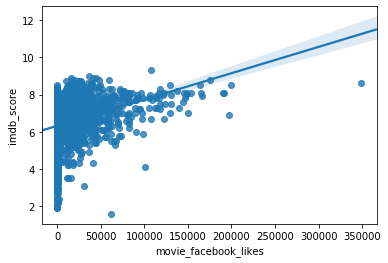

In [40]:
sns.regplot(movie_df['movie_facebook_likes'], movie_df['imdb_score'])

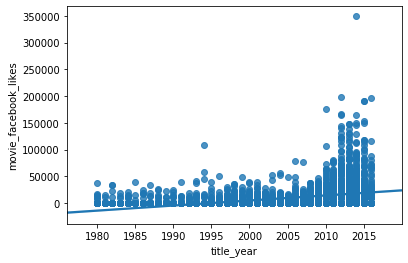

In [41]:
sns.regplot(movie_df['title_year'],movie_df['movie_facebook_likes'])

Here we include only movies with facebook likes and facebook cast likes

In [42]:
new = movie_df.query("movie_facebook_likes != 0")
new = new.query("cast_total_facebook_likes != 0")

In [43]:
data4 = new[['duration','budget','Biography','Comedy','Crime','Drama','Romance',
                  'Mystery_Thriller_Horror','Sci-Fi_Fantasy','Family_Animation','Action_Adventure',
                  'History_War','Others','director_rank',
                 'actor1_rank','actor2_rank','actor3_rank'
                  ,'movie_facebook_likes','cast_total_facebook_likes','facenumber_in_poster']]

In [ ]:
y = movie_df['imdb_score']
X_train, X_test, y_train, y_test = train_test_split(data4, y, test_size=0.30)
MM = MinMaxScaler(feature_range=(0, 1), copy=True)
X_train_MM = MM.fit_transform(X_train) # standardize X_train
X_test_MM = MM.transform(X_test) # standardize X_test
X_train_scaled = pd.DataFrame(data=X_train_MM,  columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=X_test_MM,  columns=X_test.columns)

### linear regression

In [44]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred= lr.predict(X_test_scaled)
print("linear regression MSE:", mean_squared_error(y_test, y_pred, multioutput='raw_values'))
print("linear regression R2:", r2_score(y_test, y_pred))

linear regression MSE: [0.34414592]
linear regression R2: 0.6734455512999777


In [45]:
df12 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df12

,Actual,Predicted
1055,7.0,7.507544
362,6.9,7.189431
944,7.2,7.117240
313,8.0,7.819918
2863,5.6,6.290665
...,...,...
1885,6.0,6.352130
2895,6.0,6.467326
2595,5.5,5.458672
3085,7.2,7.195311


### ridge

In [46]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
ridge = linear_model.Ridge()
gridridge = GridSearchCV(ridge, parameters, scoring ='r2')
gridridge.fit(X_train_scaled, y_train)

y_pred = gridridge.predict(X_test_scaled)

print("ridge best parameters:", gridridge.best_params_)
print("ridge score:", gridridge.score(X_test_scaled, y_test))
print("ridge MSE:", mean_squared_error(y_test, gridridge.predict(X_test_scaled)))
print("ridge best estimator coef:", gridridge.best_estimator_.coef_)

ridge best parameters: {'alpha': 0.8}
ridge score: 0.673469671877164
ridge MSE: 0.3441205021597735
ridge best estimator coef: [ 7.97079283e-01  1.65655443e-01 -4.83601526e-02  5.54794981e-02
  1.59724261e-01 -6.02647863e-02 -1.05283042e-01 -3.57563307e-02
  8.08446776e-02  6.25446972e-03 -8.16055139e-02  2.90919083e-02
  5.42791837e+00  2.26491766e-01 -4.30623374e-03 -2.30952422e-01
  1.49171699e+00  1.35627148e-01 -5.31778270e-01 -1.37629729e+00]


In [47]:
df13 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df13

,Actual,Predicted
1055,7.0,7.481161
362,6.9,7.178747
944,7.2,7.107600
313,8.0,7.792566
2863,5.6,6.301613
...,...,...
1885,6.0,6.365336
2895,6.0,6.473477
2595,5.5,5.466789
3085,7.2,7.183231


### lasso

In [48]:
parameters = {'alpha': np.concatenate((np.arange(0.01,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
lasso = linear_model.Lasso()
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')
gridlasso.fit(X_train_scaled, y_train)

y_pred = gridlasso.predict(X_test_scaled)

print("lasso best parameters:", gridlasso.best_params_)
print("lasso score:", gridlasso.score(X_test_scaled, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test_scaled)))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)

lasso best parameters: {'alpha': 0.01}
lasso score: 0.6539096857639983
lasso MSE: 0.36473418384195
lasso best estimator coef: [ 0.          0.08402777 -0.05897211  0.          0.20697237 -0.0105958
 -0.04670987 -0.         -0.         -0.         -0.          0.
  5.28582972  0.         -0.         -0.          0.          0.
 -0.         -0.        ]


In [49]:
df14 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df14

,Actual,Predicted
1055,7.0,7.190864
362,6.9,7.131891
944,7.2,7.180268
313,8.0,7.190864
2863,5.6,6.323162
...,...,...
1885,6.0,6.530135
2895,6.0,6.483425
2595,5.5,5.592866
3085,7.2,7.180268


### elastic net

In [50]:
parameters = {'alpha': np.concatenate((np.arange(0.01,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
en = linear_model.ElasticNet()
gridlasso = GridSearchCV(en, parameters, scoring ='r2')
gridlasso.fit(X_train_scaled, y_train)

y_pred = gridlasso.predict(X_test_scaled)

print("lasso best parameters:", gridlasso.best_params_)
print("lasso score:", gridlasso.score(X_test_scaled, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test_scaled)))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)

lasso best parameters: {'alpha': 0.01}
lasso score: 0.6254588297680825
lasso MSE: 0.39471768616614095
lasso best estimator coef: [ 7.63940570e-02  1.55393489e-01 -1.24683372e-01  2.46963222e-02
  2.64556436e-01 -5.52614942e-02 -1.03472613e-01 -7.67372318e-03
 -0.00000000e+00 -1.57608953e-02  0.00000000e+00  3.03373986e-03
  4.20452615e+00  8.84849107e-02 -0.00000000e+00 -2.79264489e-02
  3.66037082e-01  0.00000000e+00 -0.00000000e+00 -4.12337124e-02]


In [51]:
df15 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df15

,Actual,Predicted
1055,7.0,7.131565
362,6.9,7.015727
944,7.2,7.073311
313,8.0,7.216350
2863,5.6,6.364951
...,...,...
1885,6.0,6.600321
2895,6.0,6.546913
2595,5.5,5.640523
3085,7.2,7.101906


# Model without likes

MSE lower than in the model with likes, but R2 is lower

In [52]:
data5 = movie_df[['duration','budget','Biography','Comedy','Crime','Drama','Romance',
                  'Mystery_Thriller_Horror','Sci-Fi_Fantasy','Family_Animation','Action_Adventure',
                  'History_War','Others','director_rank',
                 'actor1_rank','actor2_rank','actor3_rank'
                 ,'facenumber_in_poster']]

In [53]:
data5.head()

,duration,budget,Biography,Comedy,Crime,Drama,Romance,Mystery_Thriller_Horror,Sci-Fi_Fantasy,Family_Animation,Action_Adventure,History_War,Others,director_rank,actor1_rank,actor2_rank,actor3_rank,facenumber_in_poster
0,123.0,48000000.0,0,1,0,0,1,0,1,0,0,0,0,8,6,3,4,1.0
1,88.0,3500000.0,0,1,0,0,0,0,0,0,0,0,0,8,2,3,4,0.0
2,104.0,4500000.0,0,0,0,1,1,0,0,0,1,0,0,7,3,3,3,0.0
3,148.0,27000000.0,0,1,1,0,0,0,0,0,1,0,1,8,3,3,4,1.0
4,98.0,6000000.0,0,1,0,0,0,0,0,0,0,0,1,7,7,3,5,3.0


In [54]:
y = movie_df['imdb_score']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(data5, y, test_size=0.30)

MM = MinMaxScaler(feature_range=(0, 1), copy=True)
X_train_MM = MM.fit_transform(X_train) # standardize X_train
X_test_MM = MM.transform(X_test) # standardize X_test
X_train_scaled = pd.DataFrame(data=X_train_MM,  columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=X_test_MM,  columns=X_test.columns)

### linear regression

In [56]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred= lr.predict(X_test_scaled)
print("linear regression R2:", r2_score(y_test, y_pred))
print("linear regression MSE:", mean_squared_error(y_test, y_pred, multioutput='raw_values'))


linear regression R2: 0.638246281983388
linear regression MSE: [0.38319442]


In [57]:
df16 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df16

,Actual,Predicted
2257,6.1,7.103313
3519,6.5,6.952845
3488,8.0,6.843445
1635,5.4,5.738196
1073,7.0,7.216591
...,...,...
3782,6.9,7.300338
2081,7.3,7.184396
2372,7.4,7.015314
2753,6.1,6.455119


### ridge

In [58]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
ridge = linear_model.Ridge()
gridridge = GridSearchCV(ridge, parameters, scoring ='r2')
gridridge.fit(X_train_scaled, y_train)

y_pred = gridridge.predict(X_test_scaled)

print("ridge best parameters:", gridridge.best_params_)
print("ridge score:", gridridge.score(X_test_scaled, y_test))
print("ridge MSE:", mean_squared_error(y_test, gridridge.predict(X_test_scaled)))
print("ridge best estimator coef:", gridridge.best_estimator_.coef_)

ridge best parameters: {'alpha': 0.2}
ridge score: 0.6383946418952156
ridge MSE: 0.3830372626272397
ridge best estimator coef: [ 0.49108169 -0.34003549  0.21281498 -0.04399127  0.05561663  0.16299694
 -0.08150637 -0.08684578 -0.04728036  0.01104862 -0.0250949  -0.09142457
  0.03796864  5.69734271  0.10771686  0.0558603  -0.24924464 -0.68902482]


In [59]:
df17 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df17

,Actual,Predicted
2257,6.1,7.100834
3519,6.5,6.950437
3488,8.0,6.843242
1635,5.4,5.742609
1073,7.0,7.214138
...,...,...
3782,6.9,7.297838
2081,7.3,7.182400
2372,7.4,7.011702
2753,6.1,6.454707


### lasso


In [60]:
parameters = {'alpha': np.concatenate((np.arange(0.01,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
lasso = linear_model.Lasso()
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')
gridlasso.fit(X_train_scaled, y_train)

y_pred = gridlasso.predict(X_test_scaled)

print("lasso best parameters:", gridlasso.best_params_)
print("lasso score:", gridlasso.score(X_test_scaled, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test_scaled)))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)

lasso best parameters: {'alpha': 0.01}
lasso score: 0.6312683923530386
lasso MSE: 0.39058587620901936
lasso best estimator coef: [ 0.00000000e+00 -0.00000000e+00  1.14742493e-01 -4.17976818e-02
  0.00000000e+00  1.96085115e-01 -7.63965719e-03 -1.14300798e-02
 -3.08330311e-03 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.32755885e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00]


In [61]:
df18 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df18

,Actual,Predicted
2257,6.1,7.154443
3519,6.5,6.955275
3488,8.0,6.955275
1635,5.4,5.822554
1073,7.0,7.165873
...,...,...
3782,6.9,7.165873
2081,7.3,7.162790
2372,7.4,7.113353
2753,6.1,6.458131


### elastic net

In [62]:
parameters = {'alpha': np.concatenate((np.arange(0.01,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
en = lasso = linear_model.ElasticNet()
griden = GridSearchCV(en, parameters, scoring ='r2')
griden.fit(X_train_scaled, y_train)

y_pred = griden.predict(X_test_scaled)

print("Elastic Net best parameters:", griden.best_params_)
print("Elastic Net score:", griden.score(X_test_scaled, y_test))
print("Elastic Net MSE:", mean_squared_error(y_test, griden.predict(X_test_scaled)))
print("Elastic Net best estimator coef:", griden.best_estimator_.coef_)

Elastic Net best parameters: {'alpha': 0.01}
Elastic Net score: 0.6055653031024515
Elastic Net MSE: 0.417812355924941
Elastic Net best estimator coef: [ 0.03138012  0.          0.18370308 -0.11435287  0.03204114  0.25521483
 -0.04816495 -0.0747615  -0.01828177 -0.         -0.          0.
  0.0097674   4.29317948  0.08335239  0.         -0.         -0.        ]


In [63]:
df19 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df19

,Actual,Predicted
2257,6.1,7.041470
3519,6.5,6.779032
3488,8.0,6.797773
1635,5.4,5.977164
1073,7.0,7.116449
...,...,...
3782,6.9,7.127197
2081,7.3,7.121974
2372,7.4,6.933579
2753,6.1,6.466865


# Connection with the director rank and profitability

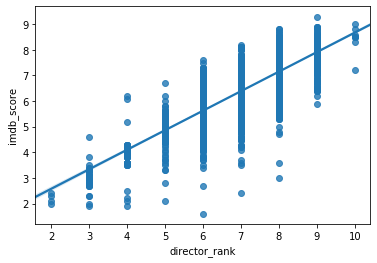

In [64]:
sns.regplot(movie_df['director_rank'], movie_df['imdb_score'])

In [65]:
new = movie_df.query("gross_budget_ratio <= 100")

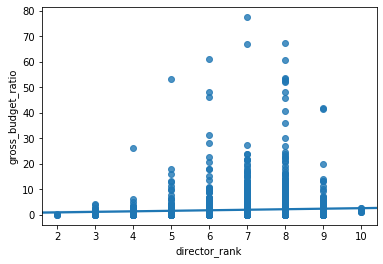

In [66]:
sns.regplot(new['director_rank'],new['gross_budget_ratio'])

We will divide films by director ranks: 2-4, 5-7,8-10

In [83]:
director_low = movie_df.query('director_rank <= 4')
director_low = director_low.query('gross_budget_ratio <= 10')
director_middle = movie_df.query('director_rank <= 7')
director_middle = director_middle.query('director_rank >4')
director_middle = director_middle.query('gross_budget_ratio <= 10')
director_high = movie_df.query('director_rank >= 8')
director_high = director_high.query('gross_budget_ratio <= 10')

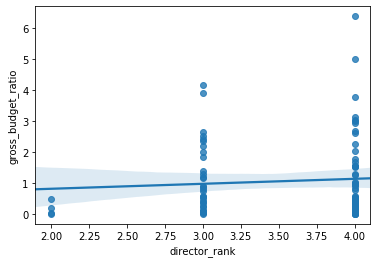

In [85]:
sns.regplot(director_low['director_rank'],director_low['gross_budget_ratio'])

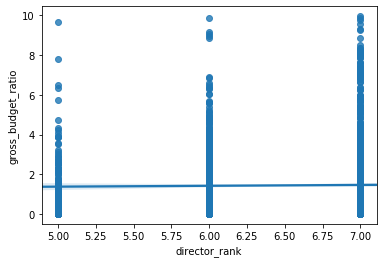

In [86]:
sns.regplot(director_middle['director_rank'],director_middle['gross_budget_ratio'])

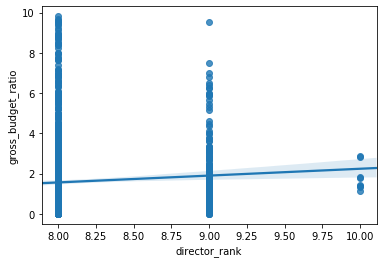

In [87]:
sns.regplot(director_high['director_rank'],director_high['gross_budget_ratio'])

### linear regression

In [89]:
d2 = movie_df.query('director_rank == 2')
d3 = movie_df.query('director_rank == 3')
d4 = movie_df.query('director_rank == 4')
d5 = movie_df.query('director_rank == 5')
d6 = movie_df.query('director_rank == 6')
d7 = movie_df.query('director_rank == 7')
d8 = movie_df.query('director_rank == 8')
d9 = movie_df.query('director_rank == 9')
d10 = movie_df.query('director_rank == 10')

In [93]:
imdb_mean2 = d2['imdb_score'].mean()
imdb_mean3 = d3['imdb_score'].mean()
imdb_mean4 = d4['imdb_score'].mean()
imdb_mean5 = d5['imdb_score'].mean()
imdb_mean6 = d6['imdb_score'].mean()
imdb_mean7 = d7['imdb_score'].mean()
imdb_mean8 = d8['imdb_score'].mean()
imdb_mean9 = d9['imdb_score'].mean()
imdb_mean10 = d10['imdb_score'].mean()

imdb_mean =[imdb_mean2,imdb_mean3,imdb_mean4,imdb_mean5,imdb_mean6,imdb_mean7,imdb_mean8,imdb_mean9,imdb_mean10]

gb_mean2 = d2['gross_budget_ratio'].mean()
gb_mean3 = d3['gross_budget_ratio'].mean()
gb_mean4 = d4['gross_budget_ratio'].mean()
gb_mean5 = d5['gross_budget_ratio'].mean()
gb_mean6 = d6['gross_budget_ratio'].mean()
gb_mean7 = d7['gross_budget_ratio'].mean()
gb_mean8 = d8['gross_budget_ratio'].mean()
gb_mean9 = d9['gross_budget_ratio'].mean()
gb_mean10 = d10['gross_budget_ratio'].mean()

gb_mean = [gb_mean2,gb_mean3,gb_mean4,gb_mean5,gb_mean6,gb_mean7,gb_mean8,gb_mean9,gb_mean10]

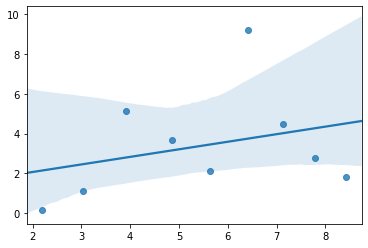

In [94]:
sns.regplot(imdb_mean,gb_mean)